In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("company-stock-movements-2010-2015-incl.csv")
df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [3]:
df = df.rename(columns={'Unnamed: 0':'company_name'})
df.head()

,company_name,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


### Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). 

This dataset represents daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

In [4]:
X = df.drop("company_name", axis=1)
X.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [5]:
y = df["company_name"]
y.unique()

array(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon',
       'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco',
       'Chevron', 'DuPont de Nemours', 'Dell', 'Ford',
       'General Electrics', 'Google/Alphabet', 'Goldman Sachs',
       'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel',
       'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark',
       'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M',
       'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman',
       'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris',
       'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments',
       'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart',
       'Exxon', 'Xerox', 'Yahoo'], dtype=object)

In [6]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [7]:
from sklearn.cluster import KMeans

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


133634.07227065778
79397.95447829986
51942.08823952061
27001.342216992216
16922.759963240373
13106.539972930319
11088.632861287046
9871.325762590008
9256.827858175535
8296.705596610456
8034.949469174511
7530.682820652546
6921.844923476617
6523.429296223772


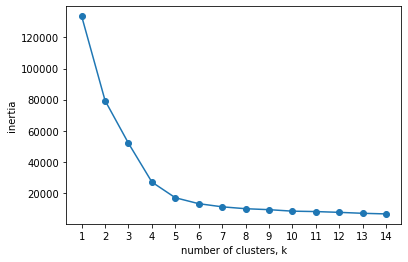

In [8]:
num_clusters = range(1, 15)
inertias = []
for k in num_clusters:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(X)
    print(model.inertia_)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_clusters)
plt.show()

### Normalizer

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(). While StandardScaler() standardizes features by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

In [9]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

In [10]:
# Create a normalizer: normalizer
normalized = Normalizer()

In [11]:
# Create a KMeans model with 10 clusters: kmeans
new_model = KMeans(n_clusters = 10)

In [12]:
from sklearn.pipeline import make_pipeline

In [13]:
# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalized,new_model)

In [14]:
# Fit pipeline to the daily price movements
pipeline.fit(X)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [15]:
# Predict the cluster labels: labels
labels = pipeline.predict(X)
labels

array([7, 0, 5, 4, 4, 8, 2, 6, 4, 1, 3, 7, 3, 4, 9, 6, 4, 5, 8, 2, 4, 6,
       9, 4, 7, 4, 8, 1, 4, 4, 4, 4, 4, 7, 6, 3, 4, 2, 1, 2, 1, 2, 2, 2,
       3, 6, 2, 4, 6, 2, 4, 4, 2, 3, 4, 8, 1, 3, 4, 5])

In [16]:
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': y})
df

,labels,companies
0,7,Apple
1,0,AIG
2,5,Amazon
3,4,American express
4,4,Boeing
5,8,Bank of America
6,2,British American Tobacco
7,6,Canon
8,4,Caterpillar
9,1,Colgate-Palmolive


In [17]:
# Display df sorted by cluster label
df.sort_values("labels")

,labels,companies
1,0,AIG
40,1,Procter Gamble
9,1,Colgate-Palmolive
56,1,Wal-Mart
27,1,Kimberly-Clark
38,1,Pepsi
46,2,Sanofi-Aventis
39,2,Pfizer
19,2,GlaxoSmithKline
49,2,Total


### Hierarchical Clustering

In [18]:
# Import normalize
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram

In [19]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(X)

In [20]:
# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'complete')

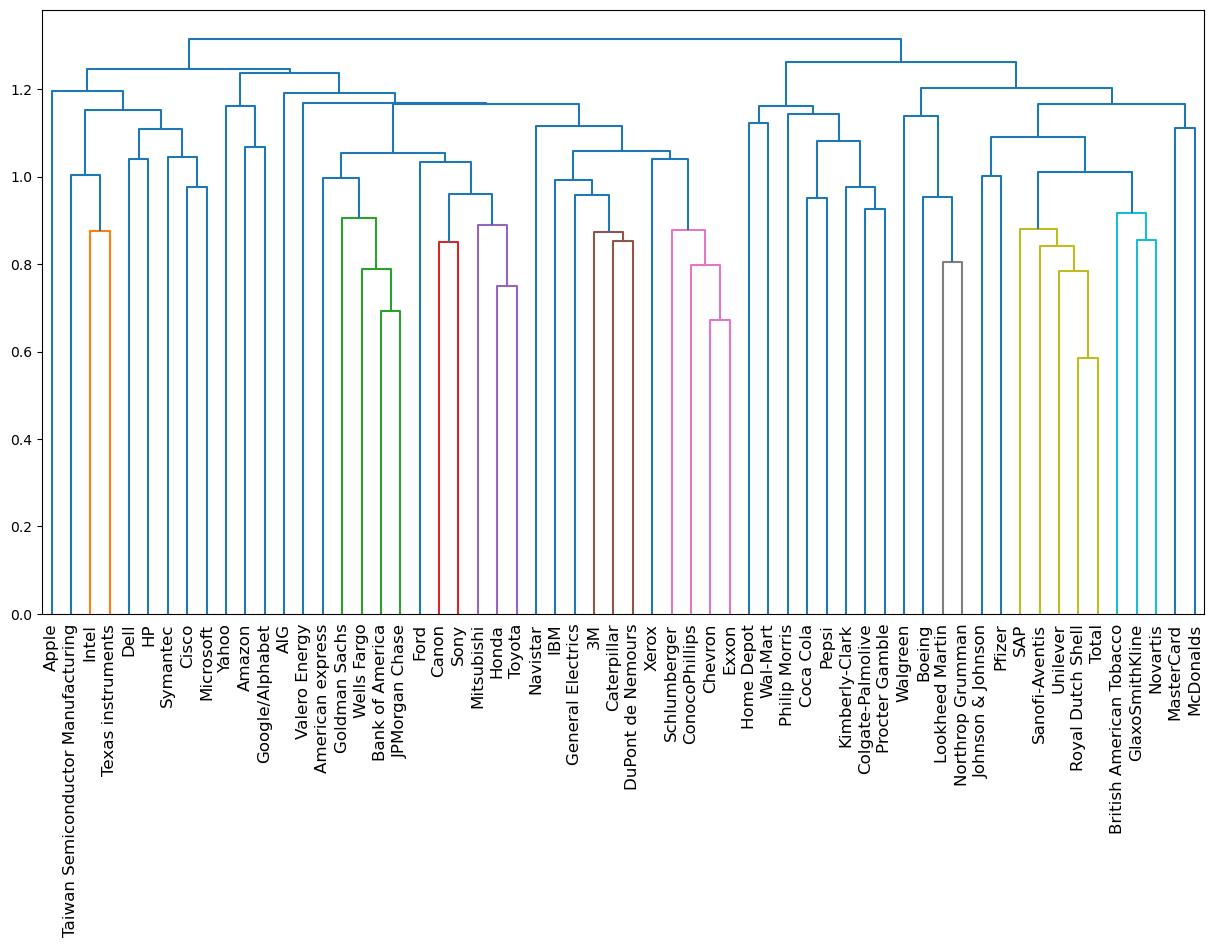

In [21]:
# Plot the dendrogram, using varieties as labels
plt.figure(figsize = (15,8), dpi= 100)
dendrogram(mergings, labels = list(y), leaf_rotation= 90, leaf_font_size=12)
plt.show()

### t-SNE(t-distributed stochastic neighbor embedding)

In [22]:
# Import TSNE
from sklearn.manifold import TSNE

In [23]:
# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

In [24]:
# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

In [25]:
tsne_features

array([[ 0.4293246 ,  0.93851906],
       [ 1.5938311 , -0.42852327],
       [ 0.94781685,  1.7056116 ],
       [ 2.0881588 ,  1.1954309 ],
       [ 6.312407  ,  1.9409802 ],
       [ 2.1744785 ,  0.2029564 ],
       [ 4.5092635 ,  3.0305197 ],
       [ 2.878393  ,  1.6953561 ],
       [ 4.588519  ,  1.0131444 ],
       [ 5.155842  ,  5.0499167 ],
       [ 5.017492  ,  1.6161788 ],
       [ 3.3851538 , -0.27541235],
       [ 4.6609    ,  1.7414213 ],
       [ 4.4526277 ,  1.0866816 ],
       [ 1.8684462 ,  2.971748  ],
       [ 2.8347352 ,  0.7686492 ],
       [ 3.4674368 ,  0.9942801 ],
       [ 0.72990674,  1.3010969 ],
       [ 2.0288613 ,  0.16696249],
       [ 4.0812674 ,  3.05027   ],
       [ 5.549994  ,  2.623717  ],
       [ 2.9339035 ,  1.6785977 ],
       [ 2.7800214 , -0.9606767 ],
       [ 4.113859  ,  0.6539155 ],
       [ 4.040606  , -0.70653087],
       [ 4.3279657 ,  4.370089  ],
       [ 2.308138  ,  0.36137176],
       [ 5.1025624 ,  5.1745033 ],
       [ 5.427007  ,

In [26]:
# Select the 0th feature: xs
xs = tsne_features[:,0]
#xs

In [27]:
# Select the 1th feature: ys
ys = tsne_features[:,1]
#ys

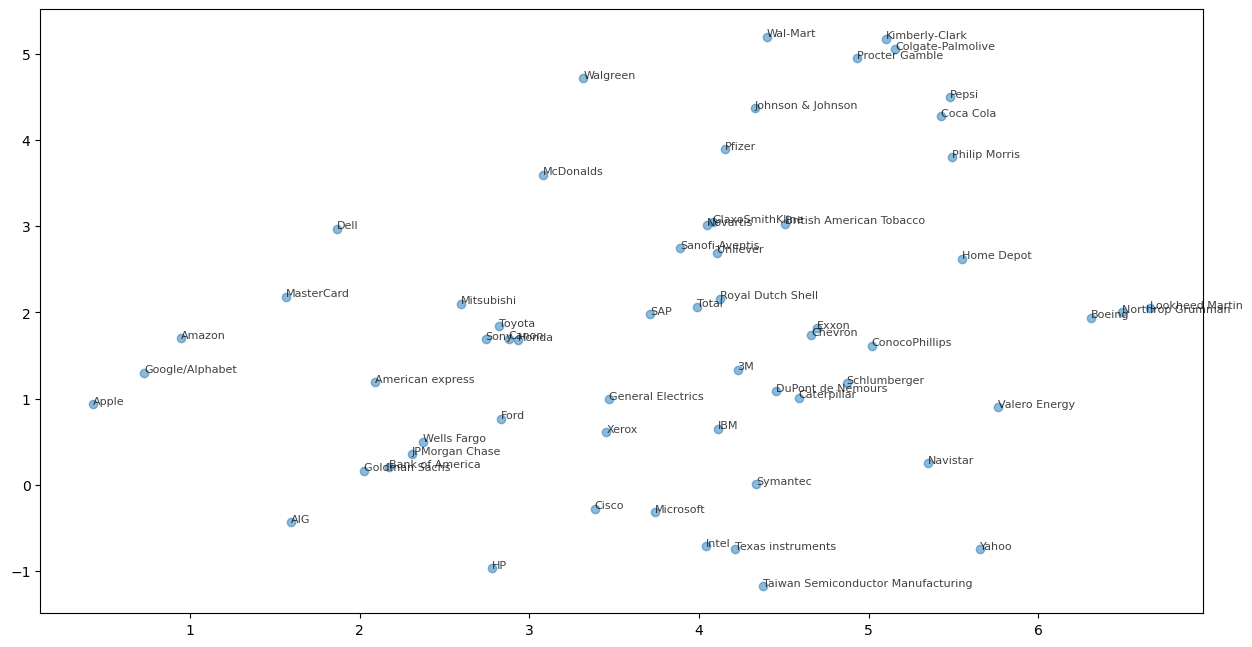

In [28]:
plt.figure(figsize = (15,8), dpi= 100)
# Scatter plot
plt.scatter(xs,ys,alpha = 0.5)

# Annotate the points
for x, y, company in zip(xs, ys, y):
    plt.annotate(company, (x, y), fontsize=8, alpha=0.75)
plt.show()
